## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

### Q1.1: Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [21]:
# Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/USA_cars_datasets.csv', low_memory=False)
vars = ['price', 'year', 'mileage']
df = df.loc[:, vars]

print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')
df.head()

(2499, 3) 

price      int64
year       int64
mileage    int64
dtype: object 

Index(['price', 'year', 'mileage'], dtype='object') 



,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [22]:
print(df['price'].describe(), '\n')
print("Total missing: ", sum(df['price'].isna()), '\n')

print(df['year'].describe(), '\n')
print("Total missing: ", sum(df['year'].isna()), '\n')

print(df['mileage'].describe(), '\n')
print("Total missing: ", sum(df['mileage'].isna()), '\n')

count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64 

Total missing:  0 

count    2499.000000
mean     2016.714286
std         3.442656
min      1973.000000
25%      2016.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: year, dtype: float64 

Total missing:  0 

count    2.499000e+03
mean     5.229869e+04
std      5.970552e+04
min      0.000000e+00
25%      2.146650e+04
50%      3.536500e+04
75%      6.347250e+04
max      1.017936e+06
Name: mileage, dtype: float64 

Total missing:  0 



There are no NAs in any of the variables/columns. After dropping the other variables, the data frame's dimensions are 2499x3.

### Q1.2: Maxmin normalize year and mileage.

In [23]:
def maxmin(col):
  col = (col - min(col)) / (max(col) - min(col))
  return col

y = df['price']
X = df.loc[:, ['year', 'mileage']]
X = X.apply(maxmin)

X.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


### Q1.3: Split the sample into ~80% for training and ~20% for evaluation.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=100)

### Q1.4: Use the  k NN algorithm and the training data to predict price using year and mileage for the test set for  k=3,10,25,50,100,300 . For each value of  k , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  k ?

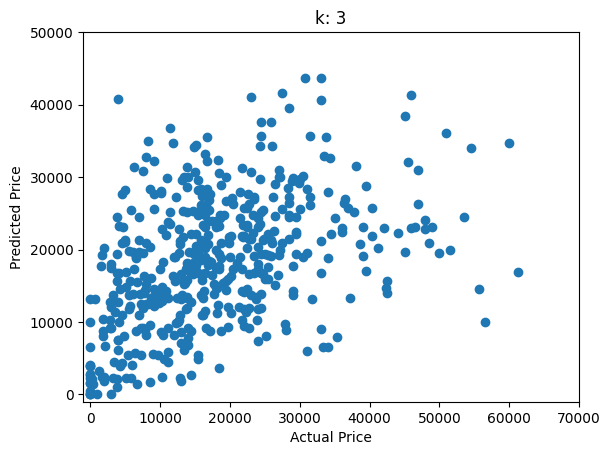

SSE:  63223286609.11111 



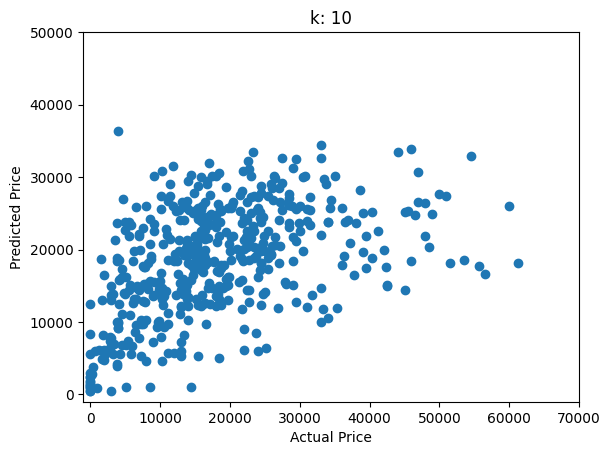

SSE:  55401092793.409996 



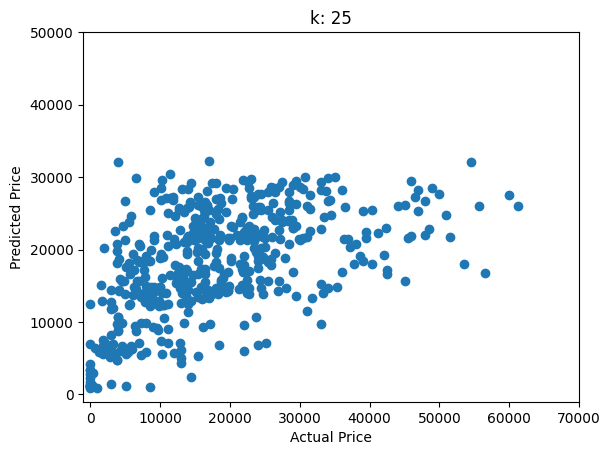

SSE:  51585228924.304 



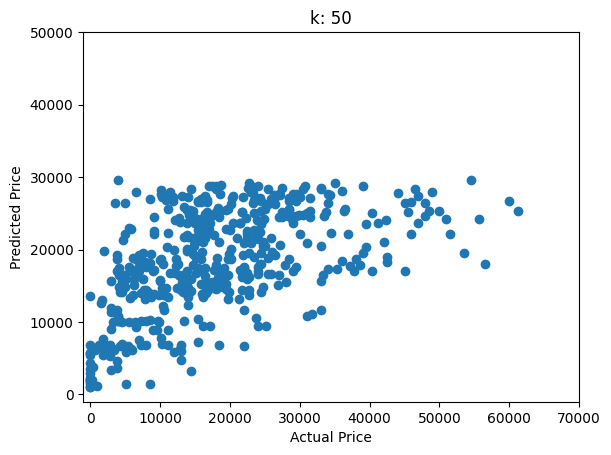

SSE:  49847721982.09799 



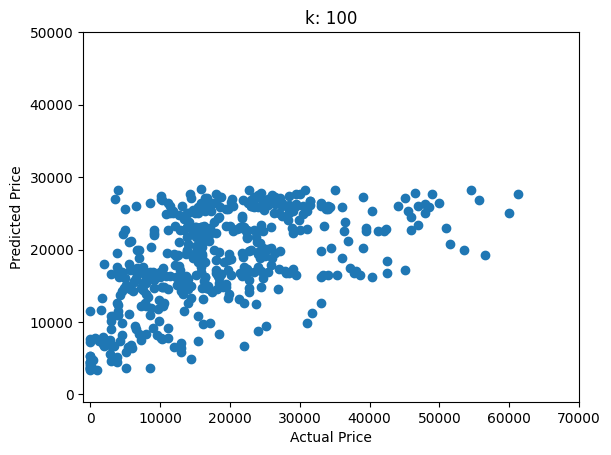

SSE:  49135529480.4603 



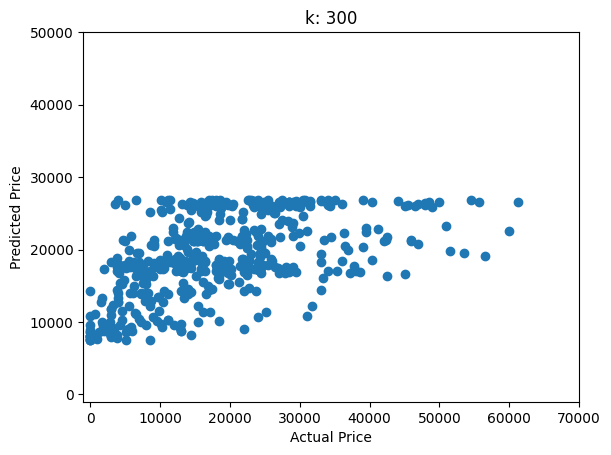

SSE:  50238649457.106 



In [35]:
from sklearn.neighbors import KNeighborsRegressor

k_list = [3, 10, 25, 50, 100, 300]
for k in k_list:
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE = np.sum((y_test-y_hat)**2)

  plot, axes = plt.subplots()
  plt.scatter(y_test, y_hat)
  plt.title('k: ' + str(k))
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  axes.set_ylim(-1000, 50000)
  axes.set_xlim(-1000, 70000)
  plt.show()
  print('SSE: ', SSE, '\n')

As the value of k increases, or as the number of neighbors checked in order to classify a point increases, the difference between the predicted and actual value of the price decreases. Thus, the model is getting more accurate. The exception in this is the SSE from k = 100 to k = 300 increases, but just barely.

Additionally, we can see in the scatter plots that the values of the predicted values decreases as k grows. The values start to hit a ceiling at just under 30000. Thus, the range of predicted values decreases as k increases.

### Q1.5: Determine the optimal  k  for these data.

In [43]:
k_bar = 200
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print("The optimal k is: ", k_star)

The optimal k is:  [77]


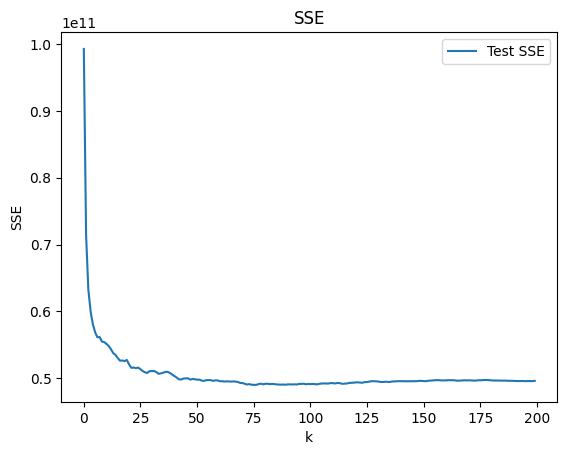

In [44]:
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

### Q1.6: Describe what happened in the plots of predicted versus actual prices as  k  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

IDK THIS ANSWER --> TODO

The smaller the value of k, the more simple our model was.

On the other hand, as the value of k increased past 77 (for k=100 and k=300), the model becomes too fitted to the training data specifically. The model is thus overfitted. When we test it on our testing data, the SSE begins to get larger again at k=300 because of this complexity.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.